In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.python.framework import ops
ops.reset_default_graph()

In [2]:
sess = tf.Session()

In [3]:
n_input = 12
n_class = 11

# Load the data
data = np.loadtxt('../dataset/training_data_LSTM_FS_1_belt.csv', delimiter=',', dtype='float32')
x_vals = data[:, :n_input]
y_vals1 = np.array([1 if y==1 else -1 for y in data[:, 12]])
y_vals2 = np.array([1 if y==2 else -1 for y in data[:, 12]])
y_vals3 = np.array([1 if y==3 else -1 for y in data[:, 12]])
y_vals4 = np.array([1 if y==4 else -1 for y in data[:, 12]])
y_vals5 = np.array([1 if y==5 else -1 for y in data[:, 12]])
y_vals6 = np.array([1 if y==6 else -1 for y in data[:, 12]])
y_vals7 = np.array([1 if y==7 else -1 for y in data[:, 12]])
y_vals8 = np.array([1 if y==8 else -1 for y in data[:, 12]])
y_vals9 = np.array([1 if y==9 else -1 for y in data[:, 12]])
y_vals10 = np.array([1 if y==10 else -1 for y in data[:, 12]])
y_vals11 = np.array([1 if y==11 else -1 for y in data[:, 12]])
y_vals = np.array([y_vals1, y_vals2, y_vals3, y_vals4, y_vals5, y_vals6, y_vals7, y_vals8, y_vals9, y_vals10, y_vals11])

print(x_vals)
print(y_vals)
print(x_vals.shape)
print(y_vals.shape)

[[ 0.          0.          0.07258    ...  0.         -0.30658
   0.9302627 ]
 [ 0.07258     0.27816638  0.09373333 ...  0.9302627  -1.6257533
   0.25942332]
 [ 0.09373333  0.3508248  -0.10695333 ...  0.25942332 -3.5582533
   0.        ]
 ...
 [ 0.62420666  0.          0.94689333 ...  0.          4.40462
   0.        ]
 [ 0.94689333  0.          1.24714    ...  0.          5.83926
   0.        ]
 [ 1.24714     0.          1.5427734  ...  0.          7.2513733
   0.        ]]
[[ 1  1  1 ... -1 -1 -1]
 [-1 -1 -1 ... -1 -1 -1]
 [-1 -1 -1 ... -1 -1 -1]
 ...
 [-1 -1 -1 ... -1 -1 -1]
 [-1 -1 -1 ... -1 -1 -1]
 [-1 -1 -1 ...  1  1  1]]
(2010, 12)
(11, 2010)


In [4]:
batch_size = 670

In [5]:
# Initialize placeholders
x_data = tf.placeholder(shape=[None, n_input], dtype=tf.float32)
y_target = tf.placeholder(shape=[n_class, None], dtype=tf.float32)
prediction_grid = tf.placeholder(shape=[None, n_input], dtype=tf.float32)

# Create variables for svm
b = tf.Variable(tf.random_normal(shape=[n_class,batch_size]))

Instructions for updating:
Colocations handled automatically by placer.


In [6]:
# Gaussian (RBF) kernel
gamma = tf.constant(-10.0)
dist = tf.reduce_sum(tf.square(x_data), 1)
dist = tf.reshape(dist, [-1,1])
sq_dists = tf.multiply(2., tf.matmul(x_data, tf.transpose(x_data)))
my_kernel = tf.exp(tf.multiply(gamma, tf.abs(sq_dists)))

In [7]:
# Declare function to do reshape/batch multiplication
def reshape_matmul(mat, _size):
    v1 = tf.expand_dims(mat, 1)
    v2 = tf.reshape(v1, [n_class, _size, 1])
    return(tf.matmul(v2, v1))

In [8]:
# Compute SVM Model
first_term = tf.reduce_sum(b)
b_vec_cross = tf.matmul(tf.transpose(b), b)
y_target_cross = reshape_matmul(y_target, batch_size)

second_term = tf.reduce_sum(tf.multiply(my_kernel, tf.multiply(b_vec_cross, y_target_cross)),[1,2])
loss = tf.reduce_sum(tf.negative(tf.subtract(first_term, second_term)))

In [9]:
# Gaussian (RBF) prediction kernel
rA = tf.reshape(tf.reduce_sum(tf.square(x_data), 1),[-1,1])
rB = tf.reshape(tf.reduce_sum(tf.square(prediction_grid), 1),[-1,1])
pred_sq_dist = tf.add(tf.subtract(rA, tf.multiply(2., tf.matmul(x_data, tf.transpose(prediction_grid)))), tf.transpose(rB))
pred_kernel = tf.exp(tf.multiply(gamma, tf.abs(pred_sq_dist)))

prediction_output = tf.matmul(tf.multiply(y_target,b), pred_kernel)
prediction = tf.argmax(prediction_output-tf.expand_dims(tf.reduce_mean(prediction_output,1), 1), 0)
accuracy = tf.reduce_mean(tf.cast(tf.equal(prediction, tf.argmax(y_target,0)), tf.float32))

In [10]:
# Declare optimizer
my_opt = tf.train.GradientDescentOptimizer(0.01)
train_step = my_opt.minimize(loss)

# Initialize variables
sess.run(tf.global_variables_initializer())

Instructions for updating:
Use tf.cast instead.


In [11]:
# Training loop
loss_vec = []
batch_accuracy = []
for i in range(20):
    rand_index = np.random.choice(len(x_vals), size=batch_size)
    rand_x = x_vals[rand_index]
    rand_y = y_vals[:,rand_index]
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    
    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec.append(temp_loss)
    
    acc_temp = sess.run(accuracy, feed_dict={x_data: rand_x,
                                             y_target: rand_y,
                                             prediction_grid:rand_x})
    batch_accuracy.append(acc_temp)
    
    print('Step #' + str(i+1))
    print('Loss = ' + str(temp_loss))
    print('Accuracy = ' + str(acc_temp))

Step #1
Loss = -22403.688
Accuracy = 0.16268657
Step #2
Loss = -29361.95
Accuracy = 0.18955223
Step #3
Loss = -32914.22
Accuracy = 0.23283581
Step #4
Loss = -37429.836
Accuracy = 0.23582089
Step #5
Loss = -40694.9
Accuracy = 0.25820896
Step #6
Loss = -46159.117
Accuracy = 0.26119402
Step #7
Loss = -39537.594
Accuracy = 0.26268658
Step #8
Loss = -44125.58
Accuracy = 0.30298507
Step #9
Loss = -42527.977
Accuracy = 0.26716417
Step #10
Loss = -53602.67
Accuracy = 0.2955224
Step #11
Loss = -44252.367
Accuracy = 0.28955224
Step #12
Loss = -46411.605
Accuracy = 0.34179103
Step #13
Loss = -50373.65
Accuracy = 0.35074627
Step #14
Loss = -60183.61
Accuracy = 0.3552239
Step #15
Loss = -49427.176
Accuracy = 0.34179103
Step #16
Loss = -48325.53
Accuracy = 0.3402985
Step #17
Loss = -54483.27
Accuracy = 0.319403
Step #18
Loss = -51257.62
Accuracy = 0.35074627
Step #19
Loss = -59475.047
Accuracy = 0.39402986
Step #20
Loss = -56168.24
Accuracy = 0.31044775


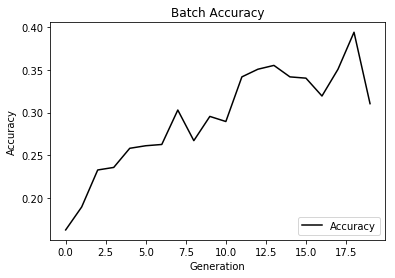

In [12]:
# Plot batch accuracy
plt.plot(batch_accuracy, 'k-', label='Accuracy')
plt.title('Batch Accuracy')
plt.xlabel('Generation')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

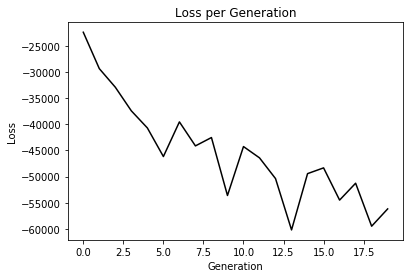

In [13]:
# Plot loss over time
plt.plot(loss_vec, 'k-')
plt.title('Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.show()